In [1]:
from eiscirc import ImpedanceModel
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Test with letter-labeled components
model = ImpedanceModel("R0-Rs//CPEa-R2//C2")
print(model._local_bounds)
print(model.bounds["CPEa_alpha"])
print(model.get_bounds("CPEa_alpha"))  # (0.001, 1.0)
print(model.get_bounds("Rs"))  # (1e-3, 1e6)
print(model.get_bounds("C2"))  # (1e-12, 1e-2)

# Set and get custom bounds
model.set_bounds(CPEa_alpha=(0.01, 0.99))
model.bounds["CPEa_alpha"]=(0.21, 0.99)
print(model.get_bounds("CPEa_alpha"))  # (0.01, 0.99)

# Still works with numbered components
model2 = ImpedanceModel("R1-CPE1")
print(model2.get_bounds("CPE1_alpha"))  # (0.001, 1.0)

{'R0': (0.001, 1000000.0), 'Rs': (0.001, 1000000.0), 'CPEa_value': (1e-12, 0.01), 'CPEa_alpha': (0.001, 1.0), 'R2': (0.001, 1000000.0), 'C2': (1e-12, 0.01)}
(0.001, 1.0)
(0.001, 1.0)
(0.001, 1000000.0)
(1e-12, 0.01)
(0.21, 0.99)
(0.001, 1.0)


In [3]:
model = ImpedanceModel("R0-Rs//CPE1-R2//C2")
model.params.CPE1.alpha, model.params.Rs

(0.8, 100)

In [4]:
model = ImpedanceModel("R1-CPE1")
print (model.get_bounds("CPE1_value"))

# Set custom bounds
model.set_bounds(CPE1_alpha=(0.0, 1.0))    #####   not working ####### !!!!!!

##### although it changes the bounds correctly, 
###### it does not save it when set_params tres to change the parameter

# Verify bounds enforcement
try:
    model.set_params (CPE1_alpha = 1.5)  # Should raise ValueError
except ValueError as e:
    print(f"Correctly caught: {e}")

try:
    model.params.CPE1_alpha = 1.5  # Should raise ValueError
except ValueError as e:
    print(f"Correctly caught: {e}")

try:
    model.set_params (CPE1_alpha = 1.5)  # Should raise ValueError
except ValueError as e:
    print(f"Correctly caught: {e}")

# Check bounds access
print(model.get_bounds("CPE1_alpha"))  # (0.0, 1.0)
print(model.bounds["CPE1_alpha"])  # (0.0, 1.0)

# Global defaults remain unchanged
model2 = ImpedanceModel("R1-CPEa")
#print(model2.get_bounds("CPEa_alpha"))  # Original bounds from PARAMETER_CONFIG

model2.set_params(CPEa_alpha=0.1)

try:
    
    model2.set_params(CPEa_alpha=0.)   #####   not working ####### !!!!!!
except ValueError as e:
    print(f"Correctly caught: {e}")

(1e-12, 0.01)
Correctly caught: CPE1_alpha must be in [0.0, 1.0], got 1.5
Correctly caught: CPE1_alpha must be in [0.0, 1.0], got 1.5
Correctly caught: CPE1_alpha must be in [0.0, 1.0], got 1.5
(0.0, 1.0)
(0.0, 1.0)
Correctly caught: CPEa_alpha must be in [0.001, 1.0], got 0.0


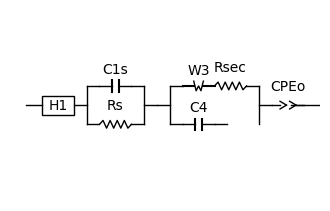

['H1', 'Rs', 'C1s', 'C4', 'W3', 'Rsec', 'CPEo']

In [5]:
model = ImpedanceModel("H1-Rs//C1s-C4//(W3-Rsec)-CPEo")
fig = model.draw_circuit(size=(4, 3))
plt.show()
model.param_names
#model.Z_imag

C:\Users\mlp\My Projects\github\eiscirc\eiscirc\circuit_parser.py:315: RuntimeWarning: overflow encountered in tanh
  return lambda omega, **params: params[structure][0] * np.tanh(params[structure][1] * np.sqrt(1j * omega)) / np.sqrt(1j * omega)


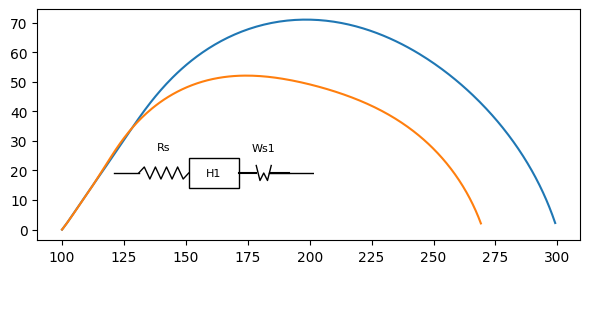

In [6]:
model = ImpedanceModel("Rs-H1-Ws1")
model.set_params(Rs=100)
omega = 2 * np.pi * np.logspace(-3, 8, 1000)  # 10 Hz to 1 MHz in rad/s

fig, ax = plt.subplots(figsize=(7, 3))
# Add circuit as inset
model.draw_circuit(ax=ax,position=[3, 3], loc = 2)

Z = model.impedance(omega)
ax.plot(model.Z_real, -model.Z_imag)

model.params.Ws1.tau = 0.7
model.params.Ws1_tau = 0.7
model.set_params(**{'Ws1.tau': 0.7}) 
model.set_params(Ws1_tau=0.7)
#### DOES NOT WORK #### model.set_params(Ws1.tau=0.7)
model.set_params(Ws1={"tau":0.7})
model.set_params(Ws1=(100.,0.7))


Z = model.impedance(omega)
ax.plot(model.Z_real, -model.Z_imag)



In [7]:
model = ImpedanceModel("R0-R1//CPE1-R2//C2")
model.set_bounds(CPE1_alpha=(0.0, 1.))
model.params.CPE1.alpha = 0.

(0.001, 1.0)
(0.001, 1.0)
(0.001, 1.0)
(0.001, 1.0)
(0.0, 1.0)
0.01 (0.0, 1.0)
0.01 (0.0, 1.0) 0.01 {'R0': 10.0, 'R1': 200.0, 'CPE1_value': 1e-06, 'CPE1_alpha': np.float64(0.01), 'R2': 100.0, 'C2': 1e-07}
0.21000000000000002 (0.0, 1.0)
0.21000000000000002 (0.0, 1.0) 0.21000000000000002 {'R0': 10.0, 'R1': 200.0, 'CPE1_value': 1e-06, 'CPE1_alpha': np.float64(0.21000000000000002), 'R2': 100.0, 'C2': 1e-07}
0.41000000000000003 (0.0, 1.0)
0.41000000000000003 (0.0, 1.0) 0.41000000000000003 {'R0': 10.0, 'R1': 200.0, 'CPE1_value': 1e-06, 'CPE1_alpha': np.float64(0.41000000000000003), 'R2': 100.0, 'C2': 1e-07}
0.6100000000000001 (0.0, 1.0)
0.6100000000000001 (0.0, 1.0) 0.6100000000000001 {'R0': 10.0, 'R1': 200.0, 'CPE1_value': 1e-06, 'CPE1_alpha': np.float64(0.6100000000000001), 'R2': 100.0, 'C2': 1e-07}
0.81 (0.0, 1.0)
0.81 (0.0, 1.0) 0.81 {'R0': 10.0, 'R1': 200.0, 'CPE1_value': 1e-06, 'CPE1_alpha': np.float64(0.81), 'R2': 100.0, 'C2': 1e-07}
1.01 (0.0, 1.0)


ValueError: CPE1_alpha must be in [0.0, 1.0], got 1.01

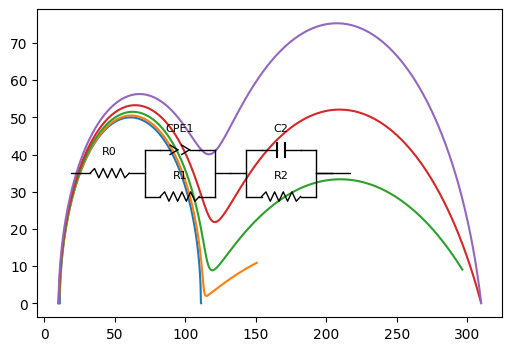

In [8]:
model = ImpedanceModel("R0-R1//CPE1-R2//C2")
print(model.get_bounds("CPE1_alpha"))  # (0.0, 1.0)
print(model.bounds["CPE1_alpha"]) 
omega = 2 * np.pi * np.logspace(-3, 8, 1000)  # 10 Hz to 1 MHz in rad/s

### Keyword input
Z = model.impedance(omega, R0=1e1, R1=2e2, CPE1=(1e-6,0.8), R2=1e2, C2=1e-7)

R0=1e1; R1=2e2; CPE1=(1e-6,0.8); R2=1e2; C2=1e-7
#### Array input
Z = model.impedance(omega, [R0, R1, CPE1, R2, C2])

#### Dictionary input
params = {'R0':R0, 'R1':R1, 'C2':C2, 'CPE1':CPE1, "R2":R2}
Z = model.impedance(omega, params)

fig, ax = plt.subplots(figsize=(6, 4))
# Add circuit as inset
model.draw_circuit(ax=ax,position=[3, 3], loc = 2)

#ax.plot(model.Z_real, -model.Z_imag)
print(model.bounds["CPE1_alpha"]) 

model.bounds.CPE1_alpha = (0.0, 1.)
print(model.get_bounds("CPE1_alpha"))

model.set_bounds(CPE1_alpha=(0.0, 1.))  # Sub-parameter
print(model.get_bounds("CPE1_alpha"))

#model.set_params(CPE1_alpha=1.4)

for x in np.arange(0.01,1.5,0.2):
    print(x, model.get_bounds("CPE1_alpha"))
    #model.params.CPE1.alpha = x   
    #model.params.CPE1_alpha=x   
    #model.set_params(CPE1_alpha=x) 
    #model.set_params(CPE1={"alpha":x})
    #model.set_params(**{"CPE1_alpha":x})
    #model.set_params(**{"CPE1.alpha":x})
    model.set_params(CPE1=(1e-6,x))

    print(x, model.get_bounds("CPE1_alpha"), model.params.CPE1.alpha, model.get_all_params())

    Z = model.impedance(omega)
    ax.plot(model.Z_real, -model.Z_imag)

ax.set_xlabel('Z\' (Ohm)')
ax.set_ylabel('-Z\'\' (Ohm)')
ax.set_title('Nyquist Plot with %s'%(model._params))
plt.tight_layout()
plt.show()

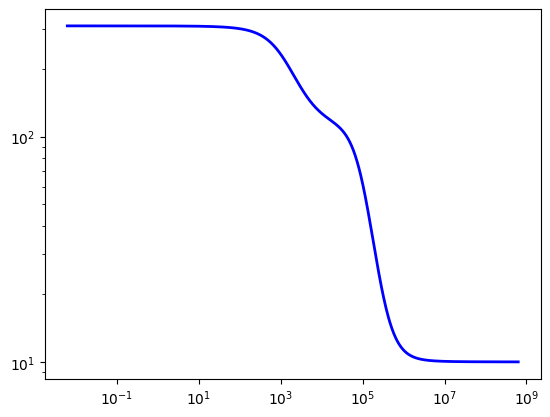

In [9]:
plt.loglog(omega, model.Z_real, 'b-', linewidth=2)